In [65]:
import numpy as np
from matplotlib import pyplot as plt
#import plotter as pl
import os
import csv
import sys
import json
sys.path.append('''./model''')
import Z2sb_model as m

In [88]:
# Read from phase transition input file
keylist = ['l1', 'l2', 'lm', 'm12', 'm22', 'Tn', 'hvtn1', 'hvtn2', 'lvtn1', 'lvtn2', 'dsdt']
keyinds = [0, 1, 2, 3, 4, 11, 12, 13, 14, 15, -1]
pt_paras_00vw = {}
for key in keylist:
    pt_paras_00vw[key] = []

files = ['input/Z2_model_data_file/0wvw_tn_all_action_e3_ext_t_all_new_V/0wvwr_tn_all_action_e3_ext_tcwd_new_V']
for filename in files:
    with open(filename, mode='r', newline='') as file:
        lines = file.readlines()

        for line in lines:
            row = line.split()
            for i, key in enumerate(keylist):
                ind = keyinds[i]
                pt_paras_00vw[key].append(float(row[ind]))

In [89]:
pt_paras_00vw['alpha'] = []
pt_paras_00vw['betaH'] = []
for i in range(10):
    mod = m.model(pt_paras_00vw['m12'][i], pt_paras_00vw['m22'][i], pt_paras_00vw['l1'][i],
              pt_paras_00vw['l2'][i], pt_paras_00vw['lm'][i], 1000.**2)
    Tn = pt_paras_00vw['Tn'][i]
    Vtot = mod.Vtot
    hv = np.array([pt_paras_00vw['hvtn1'][i], pt_paras_00vw['hvtn2'][i]])
    lv = np.array([pt_paras_00vw['lvtn1'][i], pt_paras_00vw['lvtn2'][i]])
    arad = np.pi**2 * 106.75 / 30
    delta_epmod = mod.epsilon(hv, Tn) - mod.epsilon(lv, Tn)
    alpha = delta_epmod / (arad*Tn**4)
    pt_paras_00vw['alpha'].append(alpha)
    pt_paras_00vw['betaH'].append(Tn*pt_paras_00vw['dsdt'][i])

Model initialized.
μh2 = 8606.103275619445
μs2 = -13686.491499762153
λh = 0.05136733072178189
λs = 0.4048718430232098
λsh = 0.4175494529109429
Model initialized.
μh2 = 9112.284041688074
μs2 = -22305.380603481524
λh = 0.06727955909250732
λs = 1.118542879565451
λsh = 0.7560468060941984
Model initialized.
μh2 = 8866.445925537218
μs2 = -21862.819867560003
λh = 0.06220302001147168
λs = 1.1414435480223992
λsh = 0.7319847001475912
Model initialized.
μh2 = 8742.786325591685
μs2 = -15879.96785695877
λh = 0.06406200465949172
λs = 0.597264700215263
λsh = 0.5384955184236282
Model initialized.
μh2 = 8302.90611276368
μs2 = -15673.834496332396
λh = 0.04771330258163641
λs = 0.5595908767255087
λsh = 0.486298024127431
Model initialized.
μh2 = 7961.852460696638
μs2 = -14744.477080036137
λh = 0.04051657931748079
λs = 0.5071947107265783
λsh = 0.44565498981245155
Model initialized.
μh2 = 8968.69650659862
μs2 = -14857.58168358561
λh = 0.06727418575659525
λs = 0.4958462890387036
λsh = 0.49949544446633676
Mode

In [90]:
outdir = 'output/vw_0wvwr'
ind_def, ind_det = [], []
alpha_def, alpha_det, vw_def = [], [], []
for filename in os.listdir(outdir):
    if filename.startswith('log'):
        index = int(filename.split('_')[1])
        file_path = os.path.join(outdir, filename)
        with open(file_path, 'r') as infile:
            lines = infile.readlines()
            try:
                if 'Solution for vw' in lines[-1]:
                    ind_def.append(index)
                    #alpha = float(lines[6].split()[-1])
                    alpha = pt_paras_00vw['alpha'][index]
                    alpha_def.append(alpha)
                    vwsol = float(lines[-1].split()[-1])
                    vw_def.append(vwsol)
                elif 'Detonation' in lines[10]:
                    ind_det.append(index)
                    #alpha = float(lines[6].split()[-1])
                    alpha = pt_paras_00vw['alpha'][index]
                    alpha_det.append(alpha)
            except:
                continue

In [91]:
vwdata = {}
vwdata['ind_det'] = ind_det
vwdata['ind_def'] = ind_def
vwdata['alpha_det'] = alpha_det
vwdata['alpha_def'] = alpha_def
vwdata['vw_def'] = vw_def
vwdata['betaH_def'] = [pt_paras_00vw['betaH'][n] for n in ind_def]
vwdata['betaH_det'] = [pt_paras_00vw['betaH'][n] for n in ind_det]
vwdata['Tn_def'] = [pt_paras_00vw['Tn'][n] for n in ind_def]
vwdata['Tn_det'] = [pt_paras_00vw['Tn'][n] for n in ind_det]
outfile = outdir + '/GWinput_0wvwr.json'
with open(outfile, 'w') as f:
    json.dump(vwdata, f)

In [85]:
# Read from phase transition output file
keylist = ['m12', 'm22', 'l1', 'l2', 'lm', 'v2re', 'strengthTc', 
           'Tn', 'lvtn1', 'lvtn2', 'hvtn1', 'hvtn2', 'strengthTn', 'alpha', 'betaH']
keyinds = [0, 1, 2, 3, 4, 5, 15, 16, 17, 18, 19, 20, 21, 22, 23]
pt_paras = {}
for key in keylist:
    pt_paras[key] = []

dirs = ['output/scan_0wvwnr']
for d in dirs:
    csv_file = d + '/Z2out.csv'  # Replace 'data.csv' with your actual file path
    with open(csv_file, mode='r', newline='') as file:
        reader = csv.reader(file)

        for row in reader:
            for i, key in enumerate(keylist):
                ind = keyinds[i]
                pt_paras[key].append(float(row[ind]))

In [72]:
import Z2sb_model as m
from helperFunctions import alpha_p, epsilon, a
from functools import partial

In [76]:
i = 1000
pt_paras = pt_paras_00vw
mod = m.model(pt_paras['m12'][i], pt_paras['m22'][i], pt_paras['l1'][i],
              pt_paras['l2'][i], pt_paras['lm'][i], 1000.**2)
Tn = pt_paras['Tn'][i]
Vtot = partial(mod.Vtot, include_radiation=True)
hv = np.array([pt_paras['hvtn1'][i], pt_paras['hvtn2'][i]])
lv = np.array([pt_paras['lvtn1'][i], pt_paras['lvtn2'][i]])
ap = a(Vtot, Tn, hv)
arad = np.pi**2 * 106.75 / 30
print(f'ap = {ap}, arad = {arad}')
delta_epmod = mod.epsilon(hv, Tn) - mod.epsilon(lv, Tn)
delta_ep = epsilon(Vtot, Tn, hv) - epsilon(Vtot, Tn, lv)
print(f'delta_epsilon from model: {delta_epmod}, delta_epsilon from helper: {delta_ep}')
print(f'alpha from model: {delta_epmod/(arad*Tn**4)}, alpha from helper: {delta_ep/(ap*Tn**4)}')

Model initialized.
μh2 = 8061.493074891985
μs2 = -13710.326378682077
λh = 0.037429460501564905
λs = 0.41287856911724286
λsh = 0.39296218603627253
ap = 36.05357701922217, arad = 35.11934232720964
delta_epsilon from model: 2165986.862760693, delta_epsilon from helper: 2470367.872205794
alpha from model: 0.0027529392000956365, alpha from helper: 0.0030584433970722766


In [78]:
from boundary_scan import match
from scipy import optimize
gsol=optimize.fsolve(lambda x:match(0.999, x[0], Tn, x[1], hv, lv, Vtot),
                     [0.999*0.9,Tn+2])
alpha_p(Vtot, Tn, gsol[1], hv, lv)

0.03585575244702836

In [86]:
outdir = 'output/vw_0wvwnr'
ind_def, ind_det = [], []
alpha_def, alpha_det, vw_def = [], [], []
for filename in os.listdir(outdir):
    if filename.startswith('log'):
        index = int(filename.split('_')[1])
        file_path = os.path.join(outdir, filename)
        with open(file_path, 'r') as infile:
            lines = infile.readlines()
            try:
                if 'Solution for vw' in lines[-1]:
                    ind_def.append(index)
                    #alpha = float(lines[6].split()[-1])
                    alpha = pt_paras['alpha'][index]
                    alpha_def.append(alpha)
                    vwsol = float(lines[-1].split()[-1])
                    vw_def.append(vwsol)
                elif 'Detonation' in lines[10]:
                    ind_det.append(index)
                    #alpha = float(lines[6].split()[-1])
                    alpha = pt_paras['alpha'][index]
                    alpha_det.append(alpha)
            except:
                continue

In [87]:
vwdata = {}
vwdata['ind_det'] = ind_det
vwdata['ind_def'] = ind_def
vwdata['alpha_det'] = alpha_det
vwdata['alpha_def'] = alpha_def
vwdata['vw_def'] = vw_def
vwdata['betaH_def'] = [pt_paras['betaH'][n] for n in ind_def]
vwdata['betaH_det'] = [pt_paras['betaH'][n] for n in ind_det]
vwdata['Tn_def'] = [pt_paras['Tn'][n] for n in ind_def]
vwdata['Tn_det'] = [pt_paras['Tn'][n] for n in ind_det]
outfile = outdir + '/GWinput_0wvwnr.json'
with open(outfile, 'w') as f:
    json.dump(vwdata, f)

In [2]:
# If there is indices.txt
log = open(outdir + 'indices_new.txt', 'r')
#log2 = open(outdir1 + 'indices_scan7.txt', 'r')
lines = log.readlines() #+ log2.readlines()
ind_det, ind_def = [], []
for line in lines:
    if 'Def' in line:
        for n in line.split()[1:]:
            ind_def.append(int(n))
    elif 'Det' in line:
        for m in line.split()[1:]:
            ind_det.append(int(m))
print(ind_def)
print(ind_det)

[7, 19, 33, 35, 50, 61, 67, 68, 71, 72, 73, 77, 97, 98, 102]
[2, 4, 6, 11, 12, 13, 14, 17, 18, 20, 21, 22, 23, 26, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 64, 65, 66, 69, 70, 74, 75, 76, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 99, 100, 101, 103, 104, 105, 63, 82]


In [37]:
i = 1
alpha_00vw, alpha_0wvwnr = [], []
lm_00vw, lm_0wvwnr = [], []
vw_00vw = []
while i < len(lines_00vw):
    if 'h2' in lines_00vw[i]:
        alpha = float(lines_00vw[i+5].split()[-1])
        alpha_00vw.append(alpha)
    if 'Solution for vw' in lines_00vw[i]:
        vw_00vw.append(float(lines_00vw[i].split()[-1]))
        '''
        if 'Undetermined' in lines[i+7]:
            udlist.append(alpha)
        elif 'Detonation' in lines[i+7] or 'Detonation' in lines[i+8]:
            alpha_det.append(alpha)
            lmdet.append(lm)
            msdet.append((m22 + 0.5*lm*246**2)**.5)
        elif 'Deflagration/Hybrid' in lines[i+7] or 'Deflagration/Hybrid' in lines[i+8]:
            alpha_def.append(alpha)
            lmdef.append(lm)
            msdef.append((m22 + 0.5*lm*246**2)**.5)
        '''
    i += 1

j = 1
while j < len(lines_0wvwnr):
    if 'h2' in lines_0wvwnr[j]:
        '''
        m12 = float(lines[i].split()[-1])
        m22 = float(lines[i+1].split()[-1])
        l1 = float(lines[i+2].split()[-1])
        l2 = float(lines[i+3].split()[-1])
        '''
        lm = float(lines_0wvwnr[j+4].split()[-1])
        alpha = float(lines_0wvwnr[j+5].split()[-1])
        alpha_0wvwnr.append(alpha)
        lm_0wvwnr.append(lm)
    j += 1

In [48]:
ind_def

[4, 3, 2, 5, 14, 13, 12, 15, 9, 0, 7, 6, 1, 8, 10, 17, 19, 18, 16]

Text(0, 0.5, '$v_w$')

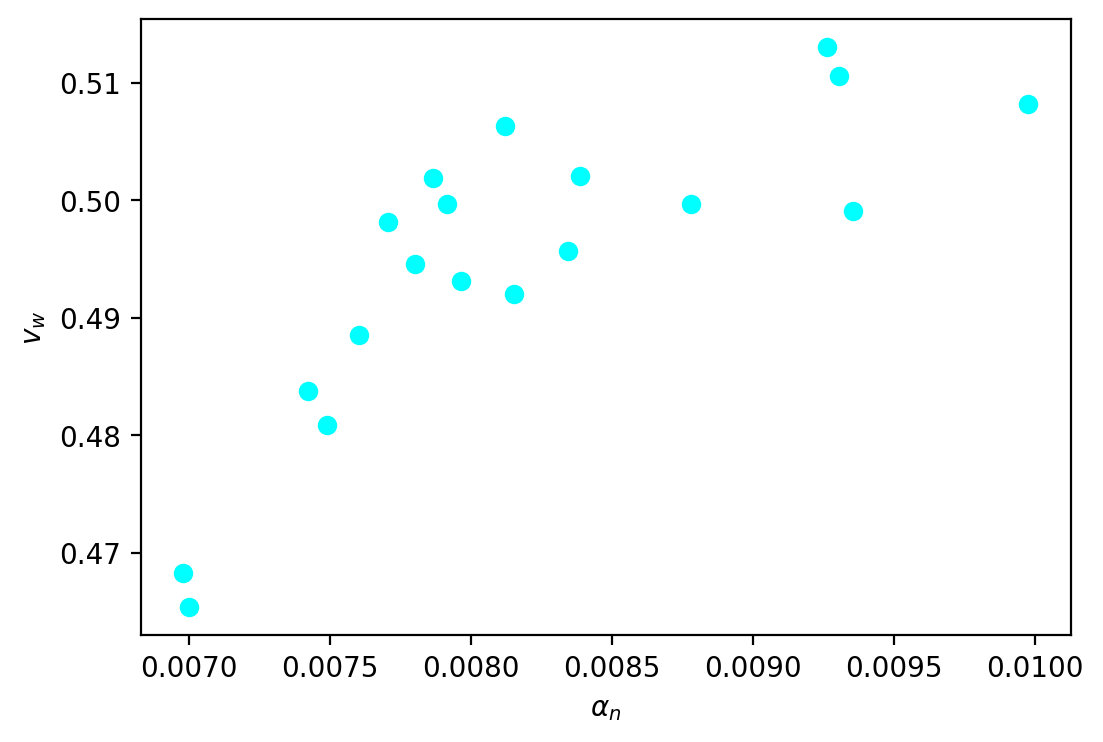

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=200)
ax.scatter(alpha_def, vw_def, c='cyan')
ax.set_xlabel(r'$\alpha_n$')
ax.set_ylabel(r'$v_w$')

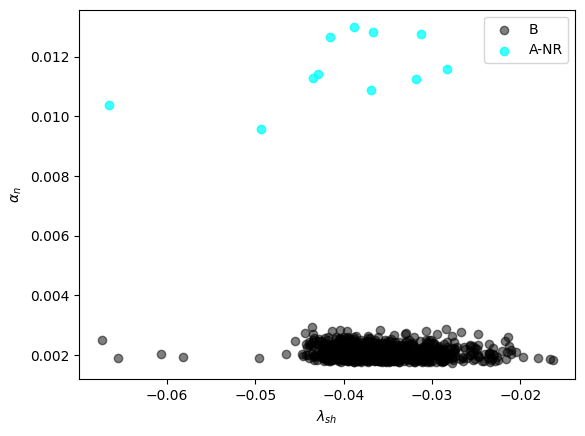

In [35]:
plt.scatter(lm_0wvwnr, alpha_0wvwnr, color='black', alpha=0.5, label='B')
plt.scatter(lm_00vw, alpha_00vw, color='cyan', alpha=0.75, label='A-NR')
plt.xlabel(r'$\lambda_{sh}$')
plt.ylabel(r'$\alpha_n$')
plt.legend()

In [ ]:
import json
file = outdir + 'data_vw_comb12.json'
with open(file, 'w') as f:
    json.dump(data, f)

In [78]:
# Read phase transition inputs from file
keylist = ['m12', 'm22', 'l1', 'l2', 'lm', 'v2re', 'm1', 'm2', 'sint', 'tanb', 'msin', 'sintin', 'tanbin']
           #'Tc', 'lvtc1', 'lvtc2','hvtc1', 'hvtc2', 'strengthTc']#, 'Tn', 'lvtn1', 'lvtn2', 'hvtn1', 'hvtn2', 'strengthTn', 'alpha', 'betaH']
pt_paras = {}
for key in keylist:
    pt_paras[key] = []

dirs = ['output/scan_2', 'output/scan_3']#, 'output/scan_9', 'output/scan_10']
for d in dirs:
    csv_file = d + '/para.csv'  # Replace 'data.csv' with your actual file path
    with open(csv_file, mode='r', newline='') as file:
        reader = csv.reader(file)

        for row in reader:
            for ind, key in enumerate(keylist):
                pt_paras[key].append(float(row[ind]))

In [52]:
lhtilde = []
for i in range(len(pt_paras['m12'])):
    lhtilde.append(pt_paras['l1'][i] - pt_paras['lm'][i]**2/(4*pt_paras['l2'][i]))
plt.scatter(lhtilde, pt_paras['strengthTc'])
plt.ylabel(r'$v_c/T_c$')
plt.xlabel(r'$\tilde{\lambda}_h$')

KeyError: 'strengthTc'

Text(0, 0.5, '$m_{s, input}$')

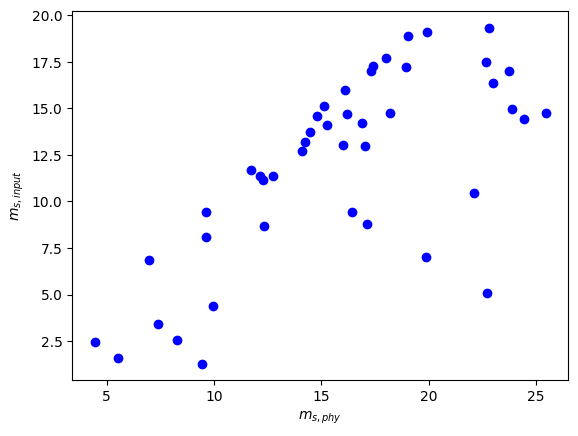

In [60]:
'''
mslist, sintlist = [], []
for i, ms in enumerate(pt_paras['m2']):
    if pt_paras['strengthTc'][i] > 1:
        mslist.append(ms)
        sintlist.append(pt_paras['sint'][i])
'''
plt.scatter(pt_paras['m2'], pt_paras['msin'], c='b')
plt.xlabel(r'$m_{s, phy}$')
plt.ylabel(r'$m_{s, input}$')

Text(0, 0.5, '$\\sin\\theta_{input}$')

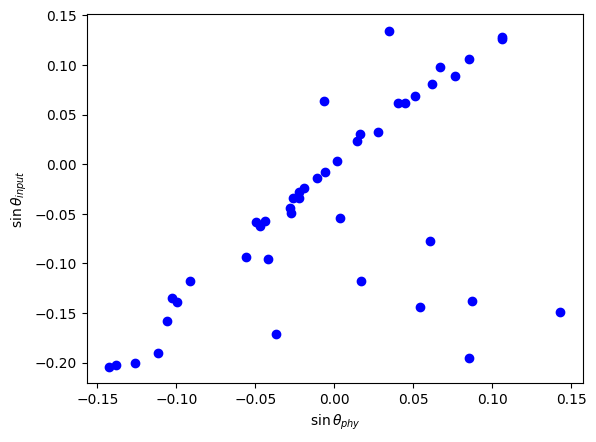

In [57]:
'''
mslist, sintlist = [], []
for i, ms in enumerate(pt_paras['m2']):
    if pt_paras['strengthTc'][i] > 1:
        mslist.append(ms)
        sintlist.append(pt_paras['sint'][i])
'''
plt.scatter(pt_paras['sint'], pt_paras['sintin'], c='b')
plt.xlabel(r'$\sin\theta_{phy}$')
plt.ylabel(r'$\sin\theta_{input}$')

Text(0, 0.5, 'input')

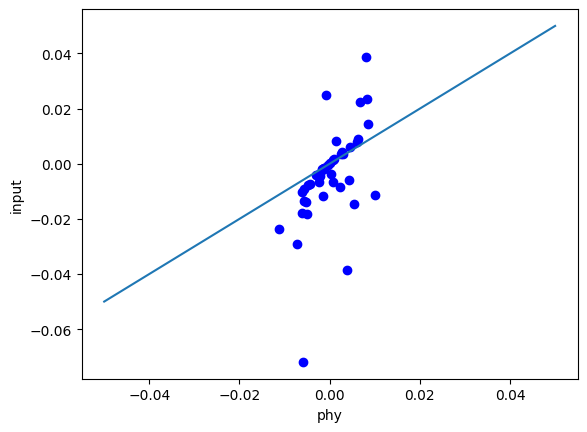

In [70]:
'''
mslist, sintlist = [], []
for i, ms in enumerate(pt_paras['m2']):
    if pt_paras['strengthTc'][i] > 1:
        mslist.append(ms)
        sintlist.append(pt_paras['sint'][i])
'''
soverm, sovermin = [], []
for i, ms in enumerate(pt_paras['m2']):
    soverm.append(pt_paras['sint'][i] / ms)
    sovermin.append(pt_paras['sintin'][i] / pt_paras['msin'][i])
plt.scatter(soverm, sovermin, c='b')
x = np.linspace(-0.05, 0.05, 100)
y = x
plt.plot(x, y)
plt.xlabel('phy')
plt.ylabel('input')

In [73]:
import Z2sb_model as m
m12 = 7090.717287515541
m22 = -447258.01930096094
l1 = 0.11699521601028394
l2 = 926.8514496193116
lm = 14.737270784110875
mod = m.model(pt_paras['m12'][i], pt_paras['m22'][i], pt_paras['l1'][i], pt_paras['l2'][i],
              pt_paras['lm'][i], pt_paras['v2re'][i])
m2phys = mod.d2V([mod.vew, mod.wew], T=0.0)
vphy = mod.findMinimum(np.array([246, 0.]), T=0.0)
print(vphy[1])
print(mod.wew)
m2physd, eigv = np.linalg.eig(m2phys)
print('physical')
print(m2physd[1]**.5)
print(eigv)
print('intput')
print(pt_paras['msin'][i])
print(pt_paras['sintin'][i])

Model initialized.
μh2 = 7775.407277705245
μs2 = -16346.3161590128
λh = 0.1279368501047724
λs = 1.438645801863783
λsh = 0.5343261498761286
11.144342273919598
11.144371506282171
physical
14.723671643049835
[[ 0.99542876 -0.09550695]
 [ 0.09550695  0.99542876]]
intput
14.724261407711547
-0.09550698501207888


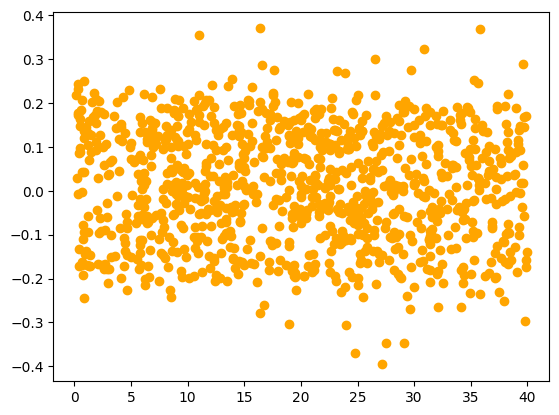

In [81]:
#plt.scatter(pt_paras['m2'], pt_paras['sint'])
plt.scatter(pt_paras['msin'], pt_paras['sintin'], c='orange')

In [47]:
ind_det, ind_def = [], []
for alpha in alpha_det:
    for ind, a in enumerate(pt_paras['alpha']):
        if abs(alpha-a) < 1e-7:
            ind_det.append(ind)
            break

for alpha in alpha_def:
    for ind, a in enumerate(pt_paras['alpha']):
        if abs(alpha-a) < 1e-7:
            ind_def.append(ind)
            break

In [46]:
len(alpha_det)

82

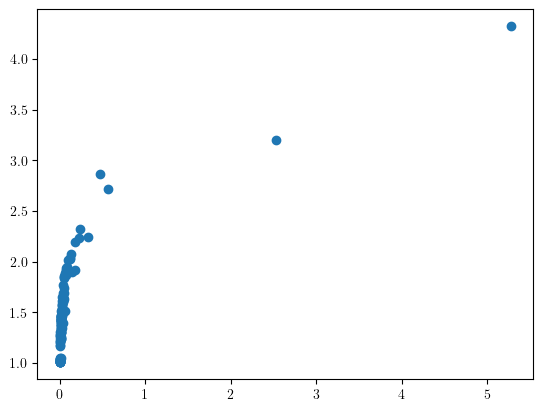

In [40]:
rlist = []
for ind, alpha in enumerate(pt_paras['alpha']):
    rlist.append(pt_paras['strengthTn'][ind] / pt_paras['strengthTc'][ind])
plt.scatter(pt_paras['alpha'], rlist)

In [6]:
rdet, rdef = [], []
alpha_det, alpha_def = [], []
for i, ind in enumerate(ind_det):
    #if i == 3:
     #   continue
    alpha_det.append(pt_paras['alpha'][ind])
    rdet.append(pt_paras['strengthTn'][ind] / pt_paras['strengthTc'][ind])

for ind in ind_def:
    alpha_def.append(pt_paras['alpha'][ind])
    rdef.append(pt_paras['strengthTn'][ind] / pt_paras['strengthTc'][ind])

In [7]:
# A different definition of supercooling parameter
rdet_1, rdef_1 = [], []
alpha_det, alpha_def = [], []
for i, ind in enumerate(ind_det):
    #if i == 3:
     #   continue
    alpha_det.append(pt_paras['alpha'][ind])
    rdet_1.append(pt_paras['Tn'][ind] / pt_paras['Tc'][ind])

for ind in ind_def:
    alpha_def.append(pt_paras['alpha'][ind])
    rdef_1.append(pt_paras['Tn'][ind] / pt_paras['Tc'][ind])

In [55]:
alpha_det.extend(data['alpha_det'])
alpha_def.extend(data['alpha_def'])
rdet.extend(data['r_det'])
rdef.extend(data['r_def'])
rdet_1.extend(data['tntc_det'])
rdef_1.extend(data['tntc_def'])

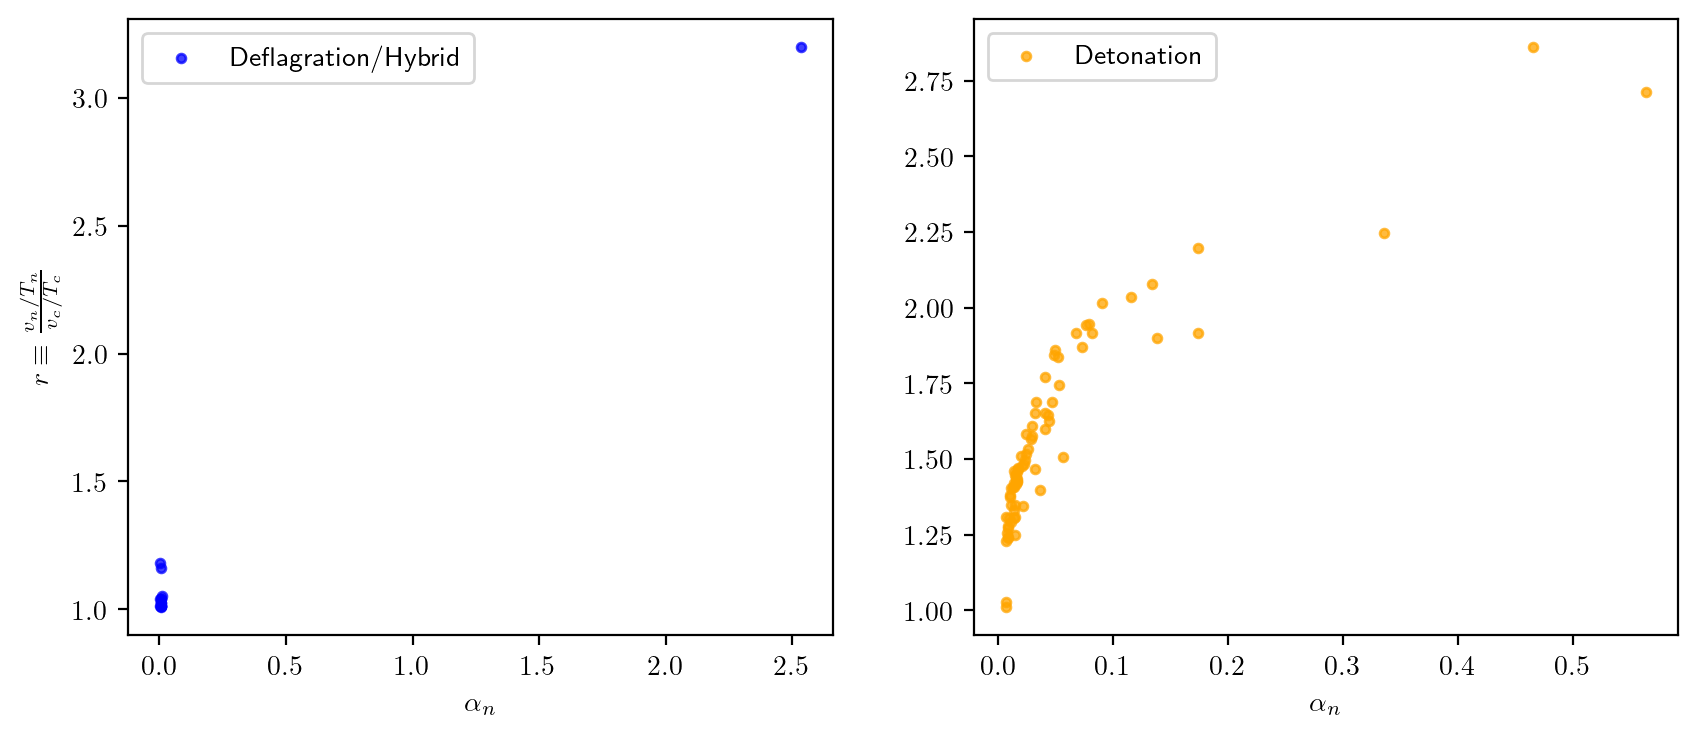

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=200)
ax[0].scatter(alpha_def, rdef, c = 'b', alpha = 0.75, s = 10, label = 'Deflagration/Hybrid')
ax[1].scatter(alpha_det, rdet, c = 'orange', alpha = 0.75, s = 10, label = 'Detonation')
ax[0].set_xlabel(r'$\alpha_n$')
ax[0].set_ylabel(r'$r\equiv\frac{v_n/T_n}{v_c/T_c}$')
ax[1].set_xlabel(r'$\alpha_n$')
#ax[1].set_ylabel(r'$r\equiv\frac{v_n/T_n}{v_c/T_c}$')
ax[0].legend()
ax[1].legend()

In [65]:
fig.savefig(outdir + 'alpha_r_comb12.png')

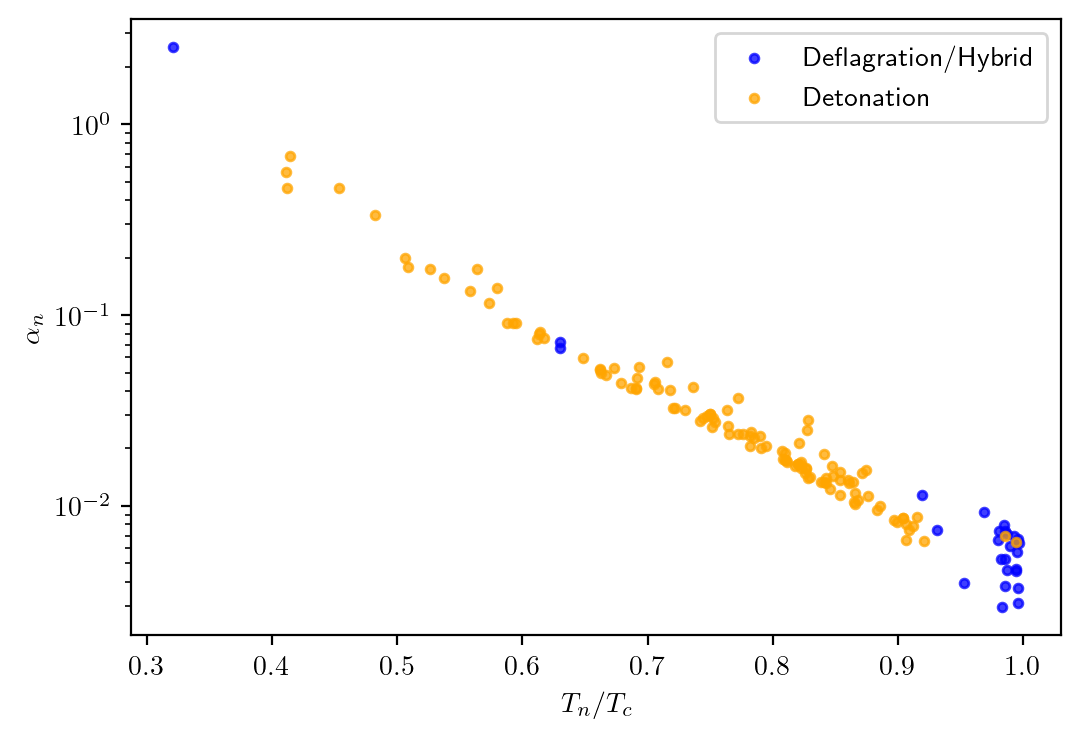

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
ax.scatter(rdef_1, alpha_def, c = 'b', alpha = 0.75, s = 10, label = 'Deflagration/Hybrid')
ax.scatter(rdet_1, alpha_det, c = 'orange', alpha = 0.75, s = 10, label = 'Detonation')
ax.set_ylabel(r'$\alpha_n$')
ax.set_xlabel(r'$T_n/T_c$')
ax.legend()
ax.set_yscale('log')

In [67]:
fig.savefig(outdir + 'alpha_r1_comb12.png')

In [87]:
w0list = []
for ind, m22 in enumerate(pt_paras['m22']):
    ls = pt_paras['l2'][ind]
    w0list.append((-m22/ls)**.5)

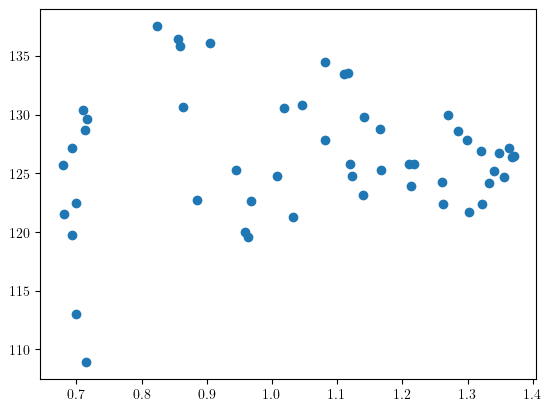

In [88]:
plt.scatter(pt_paras['lm'], w0list)

In [48]:
import Z2_model as m
from functools import partial
from helperFunctions import a

In [52]:
mhhv_det, mshv_det, mhlv_det, mslv_det = [], [], [], []
b_det, b_det_bag = [], []
for index, i in enumerate(ind_det):
    #if index == 3:
         #continue
    mod = m.model(pt_paras['m12'][i], pt_paras['m22'][i], pt_paras['l1'][i], pt_paras['l2'][i], pt_paras['lm'][i], pt_paras['v2re'][i])
    Vtot = partial(mod.Vtot, include_radiation=True)
    hv = np.array([pt_paras['hvtn1'][i], pt_paras['hvtn2'][i]])
    lv = np.array([pt_paras['lvtn1'][i], pt_paras['lvtn2'][i]])
    Tn = pt_paras['Tn'][i] 
    m2hv, nhv, chv = mod.boson_massSq(hv, Tn)
    m2lv, nlv, clv = mod.boson_massSq(lv, Tn)
    mhhv_det.append(abs(m2hv[0])**.5/Tn)
    mshv_det.append(abs(m2hv[1])**.5/Tn)
    mhlv_det.append(abs(m2lv[0])**.5/Tn)
    mslv_det.append(abs(m2lv[1])**.5/Tn)
    '''
    Bag model
    '''
    ap, am = mod.nt + 83.25, 83.25
    for j in range(len(m2hv)):
        if abs(m2hv[j]) / Tn**2 < 0.25:
            ap += nhv[j]
        if abs(m2lv[j]) / Tn**2 < 0.25:
            am += nlv[j]
    b_det_bag.append(am / ap)
    '''
    Real dof
    '''
    ap = a(Vtot, Tn, hv)
    am = a(Vtot, Tn, lv)
    b_det.append(am / ap)

Model initialized.
μh2 = -7806.564
μs2 = -15333.43288
λh = 0.129
λs = 1.0
λsh = 1.165560775
Model initialized.
μh2 = -7806.564
μs2 = -15099.90369
λh = 0.129
λs = 1.0
λsh = 1.016012812
Model initialized.
μh2 = -7806.564
μs2 = -14725.39713
λh = 0.129
λs = 1.0
λsh = 1.331049739
Model initialized.
μh2 = -7806.564
μs2 = -14584.64439
λh = 0.129
λs = 1.0
λsh = 0.96974631
Model initialized.
μh2 = -7806.564
μs2 = -16651.65785
λh = 0.129
λs = 1.0
λsh = 0.708991612
Model initialized.
μh2 = -7806.564
μs2 = -17493.41639
λh = 0.129
λs = 1.0
λsh = 0.985977369
Model initialized.
μh2 = -7806.564
μs2 = -15845.4649
λh = 0.129
λs = 1.0
λsh = 1.333208653
Model initialized.
μh2 = -7806.564
μs2 = -16619.87623
λh = 0.129
λs = 1.0
λsh = 0.69763142
Model initialized.
μh2 = -7806.564
μs2 = -14146.50012
λh = 0.129
λs = 1.0
λsh = 1.056621495
Model initialized.
μh2 = -7806.564
μs2 = -17179.22554
λh = 0.129
λs = 1.0
λsh = 0.937286237
Model initialized.
μh2 = -7806.564
μs2 = -16267.18397
λh = 0.129
λs = 1.0
λsh = 1.1

In [53]:
mhhv_def, mshv_def, mhlv_def, mslv_def = [], [], [], []
b_def, b_def_bag = [], []
for i in ind_def:
    mod = m.model(pt_paras['m12'][i], pt_paras['m22'][i], pt_paras['l1'][i], pt_paras['l2'][i], pt_paras['lm'][i], pt_paras['v2re'][i])
    Vtot = partial(mod.Vtot, include_radiation=True)
    hv = np.array([pt_paras['hvtn1'][i], pt_paras['hvtn2'][i]])
    lv = np.array([pt_paras['lvtn1'][i], pt_paras['lvtn2'][i]])
    Tn = pt_paras['Tn'][i] 
    m2hv, nhv, chv = mod.boson_massSq(hv, Tn)
    m2lv, nlv, clv = mod.boson_massSq(lv, Tn)
    mhhv_def.append(abs(m2hv[0])**.5/Tn)
    mshv_def.append(abs(m2hv[1])**.5/Tn)
    mhlv_def.append(abs(m2lv[0])**.5/Tn)
    mslv_def.append(abs(m2lv[1])**.5/Tn)
    '''Bag model'''
    ap, am = mod.nt + 83.25, 83.25
    for j in range(len(m2hv)):
        if abs(m2hv[j]) / Tn**2 < 0.25:
            ap += nhv[j]
        if abs(m2lv[j]) / Tn**2 < 0.25:
            am += nlv[j]
    b_def_bag.append(am / ap)
    '''Real dof'''
    ap = a(Vtot, Tn, hv)
    am = a(Vtot, Tn, lv)
    b_def.append(am / ap)

Model initialized.
μh2 = -7806.564
μs2 = -12664.12514
λh = 0.129
λs = 1.0
λsh = 0.656376207
Model initialized.
μh2 = -7806.564
μs2 = -15916.19425
λh = 0.129
λs = 1.0
λsh = 0.690778182
Model initialized.
μh2 = -7806.564
μs2 = -16877.69933544953
λh = 0.129
λs = 1.0
λsh = 0.7087190616922012
Model initialized.
μh2 = -7806.564
μs2 = -16862.745464877135
λh = 0.129
λs = 1.0
λsh = 0.6983751534261926
Model initialized.
μh2 = -7806.564
μs2 = -13221.8261646414
λh = 0.129
λs = 1.0
λsh = 0.6937526431814792
Model initialized.
μh2 = -7806.564
μs2 = -16116.962020001274
λh = 0.129
λs = 1.0
λsh = 0.7141624397967188
Model initialized.
μh2 = -7806.564
μs2 = -16660.384024277802
λh = 0.129
λs = 1.0
λsh = 1.2552395792696356
Model initialized.
μh2 = -7806.564
μs2 = -16986.106871564712
λh = 0.129
λs = 1.0
λsh = 0.7106624297511377
Model initialized.
μh2 = -7806.564
μs2 = -12173.115715293887
λh = 0.129
λs = 1.0
λsh = 0.9728118141381721
Model initialized.
μh2 = -7806.564
μs2 = -14590.330371217766
λh = 0.129
λs = 

In [58]:
b_det.extend(data['b_det'])
b_def.extend(data['b_def'])

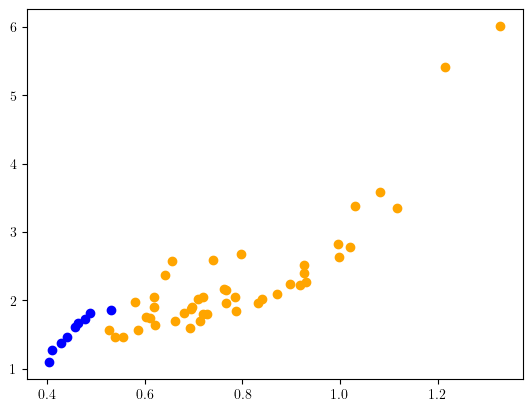

In [26]:
plt.scatter(mshv_def, mhhv_def, c='b')
plt.scatter(mshv_det, mhhv_det, c='orange')

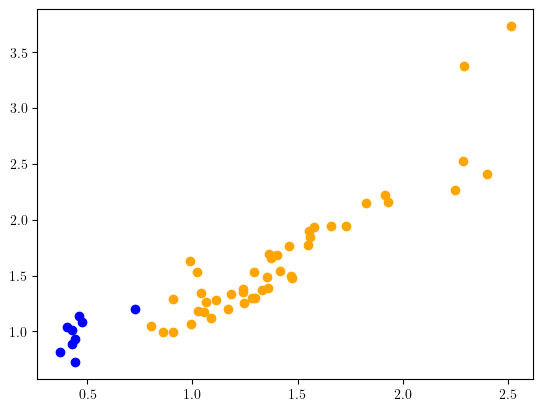

In [27]:
plt.scatter(mslv_def, mhlv_def, c='b')
plt.scatter(mslv_det, mhlv_det, c='orange')

(array([ 1.,  1.,  1.,  2.,  0.,  0.,  1.,  1.,  4.,  1.,  1.,  5.,  5.,
         7., 15., 10., 11., 24., 17., 10.]),
 array([0.88352903, 0.88864464, 0.89376025, 0.89887587, 0.90399148,
        0.90910709, 0.91422271, 0.91933832, 0.92445393, 0.92956955,
        0.93468516, 0.93980077, 0.94491639, 0.950032  , 0.95514761,
        0.96026323, 0.96537884, 0.97049445, 0.97561007, 0.98072568,
        0.98584129]),
 [<matplotlib.patches.Polygon at 0x7faf912ff8e0>])

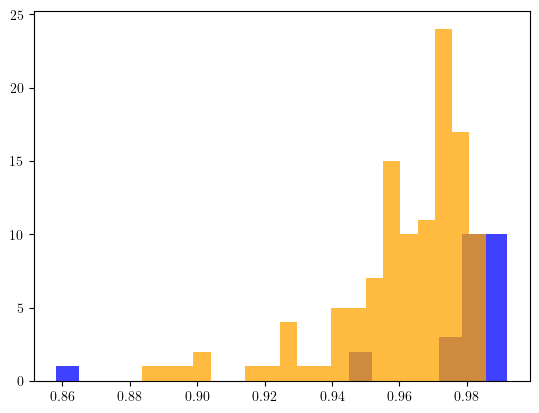

In [68]:
plt.hist(b_def, 20, histtype='stepfilled', facecolor='b', 
         alpha=0.75, label='Deflagration/Hybrid')
plt.hist(b_det, 20, histtype='stepfilled', facecolor='orange', 
         alpha=0.75, label='Detonation')

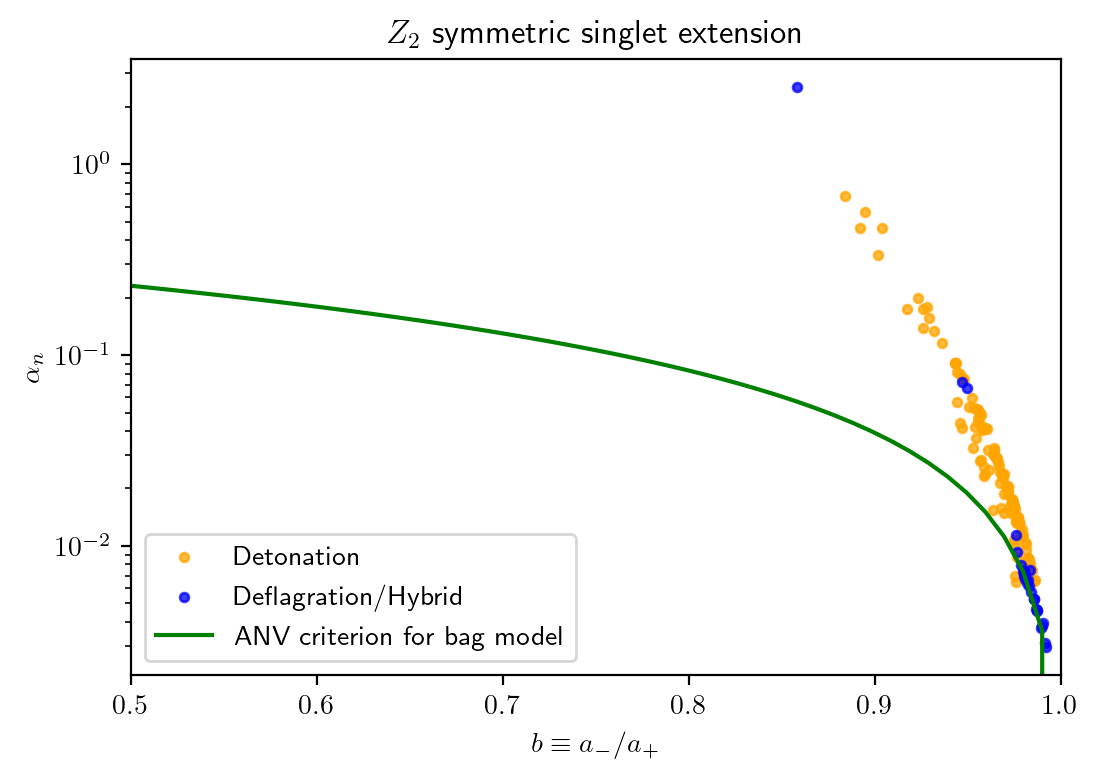

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=200)
ax.scatter(b_det, alpha_det, c='orange', s=10, alpha=0.75, label='Detonation')
ax.scatter(b_def, alpha_def, c='b', s=10, alpha=0.75, label='Deflagration/Hybrid')
y = lambda b : (1-b)*(1+4/3*np.sqrt((1-b)/6))/3
brange = np.linspace(0.5, 1.0, 50)
ax.plot(brange, y(brange), c='green', label="ANV criterion for bag model")
ax.set_xlabel(r'$b\equiv a_{-}/a_{+}$')
ax.set_ylabel(r'$\alpha_n$')
ax.set_yscale('log')
ax.set_xlim([0.5, 1.0])
ax.set_title(r'$Z_2$ symmetric singlet extension')
ax.legend(loc='lower left')

In [60]:
fig.savefig(outdir + 'alpha_b_comb12.png')

In [61]:
data = {}
data['alpha_det'] = alpha_det
data['alpha_def'] = alpha_def
data['r_det'] = rdet
data['r_def'] = rdef
data['tntc_det'] = rdet_1
data['tntc_def'] = rdef_1
data['b_det'] = b_det
data['b_def'] = b_def

In [62]:
import json
file = outdir + 'data_vw_comb12.json'
with open(file, 'w') as f:
    json.dump(data, f)

In [39]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Debug vJ

In [9]:
from scipy import integrate
from scipy import optimize
from scipy import interpolate
from helperFunctions import derivative, alpha_p, cs_sq, dYdtau, dvTdxi, r_func, μ, ω, p, e, s, find_vw_ds
from functools import partial

In [10]:
import scipy as sp
print(sp.__version__)

1.10.0


In [11]:
from helperFunctions import vJ
def test_vJ(vw, mod):
    Tnuc, hv, lv = mod.Tn, mod.hvev, mod.Tnvev
    Vtot = partial(mod.Vtot, include_radiation=True)
    gsol=optimize.fsolve(lambda x:match(vw, x[0], Tnuc, x[1], hv, lv, Vtot),[vw*0.9,Tnuc+2])
    return vJ(alpha_p(Vtot, Tnuc, gsol[1], hv, lv))

def match(vp,vm,Tp,Tm, high_vev, low_vev, Vtot):
    r = r_func(Vtot, Tp, Tm, high_vev, low_vev)
    αp = alpha_p(Vtot, Tp, Tm, high_vev, low_vev)
    vpvm = 1-(1-3*αp)*r
    vpvm = vpvm/(3-3*(1+αp)*r)
    ratio = 3 + (1-3*αp)*r
    ratio = ratio/(1+3*(1+αp)*r)
    return [vp*vm - vpvm, vp/vm - ratio]

In [12]:
import Z2_model as m

In [13]:
i = ind_det[rdet.index(min(rdet))]
mod = m.model(pt_paras['m12'][i], pt_paras['m22'][i], pt_paras['l1'][i], pt_paras['l2'][i], pt_paras['lm'][i], pt_paras['v2re'][i])

Model initialized.
μh2 = -7806.564
μs2 = -16619.87623
λh = 0.129
λs = 1.0
λsh = 0.69763142


In [14]:
pt_paras['alpha'][i]

0.006487497

In [15]:
mod.hvev = np.array([pt_paras['hvtn1'][i], pt_paras['hvtn2'][i]])
mod.Tnvev = np.array([pt_paras['lvtn1'][i], pt_paras['lvtn2'][i]])
mod.Tn = pt_paras['Tn'][i]

In [16]:
i

17

In [21]:
vwlist = np.linspace(0.66, 0.67, 50)
vjlist = []
for vw in vwlist:
    vjlist.append(test_vJ(vw, mod))

/Users/tongou/miniconda3/envs/py3-10-9/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0, 0.5, '$v_J$')

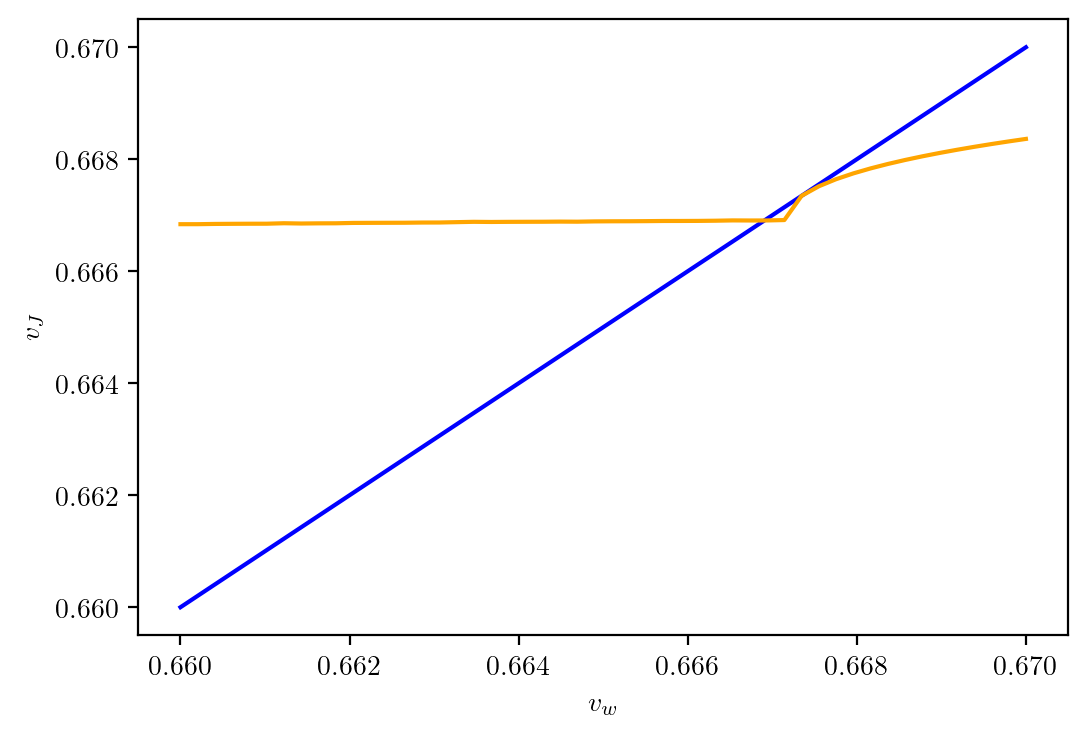

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=200)
ax.plot(vwlist, vwlist, c='b')
ax.plot(vwlist, vjlist, c='orange')
ax.set_xlabel(r'$v_w$')
ax.set_ylabel(r'$v_J$')

In [25]:
fig.savefig(outdir + 'vw_vj_17.png')

In [141]:
vwmax = 1.0
eps = 0.001
for j in range(1000):
    vw = vwmax - j*eps
    if test_vJ(vw, mod) > vw:
        vwmin = vw
        break
print(vwmin)

0.635


In [125]:
vJvalue = optimize.brentq(lambda vw:test_vJ(vw, mod) - vw, vwmin, 0.6365, xtol=1e-6)

ValueError: f(a) and f(b) must have different signs

In [127]:
vJvalue

0.6350865825011688

In [126]:
def det_bc(vp, Tp, vmguess, Tmguess, mod):
    hv, lv, Vtot = mod.hvev, mod.Tnvev, partial(mod.Vtot, include_radiation=True)
    vm,Tm =optimize.fsolve(lambda x:match(vp, x[0], Tp, x[1], hv, lv, Vtot), [vmguess, Tmguess])
    try:    
        ds = s(vp, Tp) - s(vm, Tm)
    except:
        print('Invalid ds')
        return vm, Tm, None
    return vm, Tm, ds

In [128]:
vm, Tm, dsJ = det_bc(vJvalue, mod.Tn, vJvalue*0.7, mod.Tn+2, mod)
print(dsJ)

0.04623815275348875


In [60]:
(18+(20+16)/8)/233*299.99+13

41.96899141630901

In [61]:
36/8

4.5